## Trabajo práctico final de Introducción a las técnicas inteligentes de resolución de problemas de planificación, secuenciación y ejecución
Alumno: Rodrigo Lazcano

Lo que veremos en esta notebook:

- Descompresion del archivo ZIP con imagenes satelitales Landsat 8 del dique Los Molinos en la fecha del 6 de enero de 2023
- realización de un análisis exploratorio de los datos y metadatos de las imagenes TIF otorgadas
- identificación de posibles outliers
- Calculo de mascara
- Recorte de bandas
- Calculo de indice NDVI y MNDWI

# Descomprimir archivo ZIP

Lo primero que haremos será descomprimir el archivo ZIP que contiene las imagenes satelitales con las que trabajeremos.

In [4]:
import zipfile

Imagenes_Landsat = zipfile.ZipFile('ImagenesLandsat.zip')
Imagenes_Landsat.extractall ()
Imagenes_Landsat.close 

print("Archivo descomprimido con éxito")

Archivo descomprimido con éxito


# Realizar un analisis exploratorio de los datos y metadatos de la imagen y mostrar algunos datos de estos

Una vez tengamos las imagenes descomprimidas, realizaremos un analisis de los datos y metadatos de los archivos correspondientes a las Bandas 3, 4, 5 y 6.

Metadatos generales del archivo:
driver: GTiff
dtype: uint16
nodata: 0.0
width: 298
height: 406
count: 1
crs: EPSG:32620
transform: | 30.00, 0.00, 350325.00|
| 0.00,-30.00,-3516975.00|
| 0.00, 0.00, 1.00|

Número de bandas: 1

Metadatos de la banda 3:
Ancho: 298
Alto: 406
Resolución: (30.0, 30.0)
Tipo de datos: uint16
CRS: EPSG:32620
Estadísticas de los datos de la banda 3
  Mínimo: 7626
  Máximo: 21482
  Promedio: 9653.61945812808
  Desviación estándar: 910.9160955095789


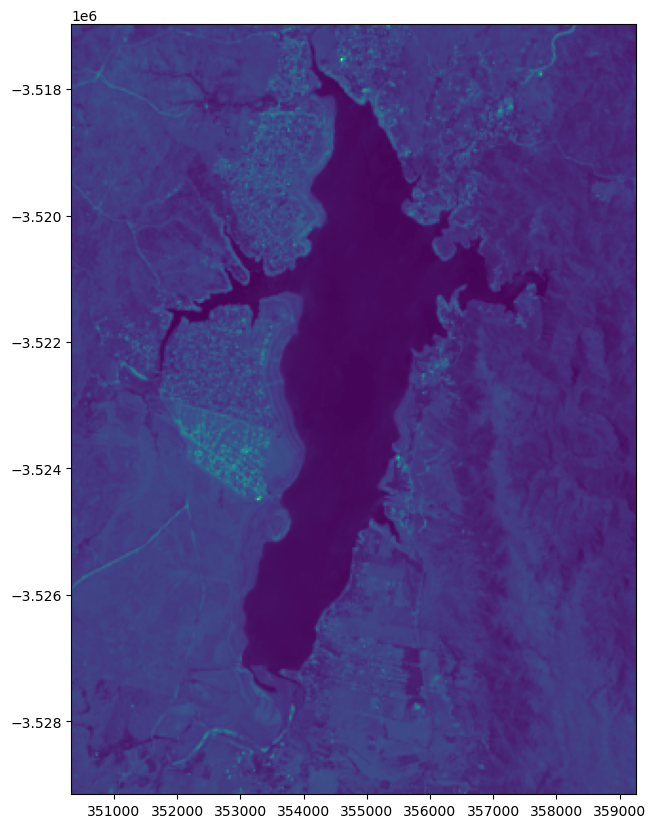

In [5]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Ruta del archivo TIF
Banda3 = '2023-01-06.SR_B3.tif'

# Abrir el archivo B3
with rasterio.open(Banda3) as src:
    # Mostrar los metadatos generales del archivo
    print("Metadatos generales del archivo:")
    for key, value in src.meta.items():
        print(f"{key}: {value}")

    # Número de bandas
    numero_bandas = src.count
    print(f"\nNúmero de bandas: {numero_bandas}")

    # Mostrar información específica de cada banda
    for i in range(1, numero_bandas + 1):
        print(f"\nMetadatos de la banda 3:")
        
        # Dimensiones de la banda
        ancho_banda = src.width
        alto_banda = src.height
        resolucion = src.res
        
        # Tipo de datos de la banda
        dtype_banda = src.dtypes[i - 1]
        
        # Sistema de referencia de coordenadas (CRS) de la banda
        crs_banda = src.crs
        
        print(f"Ancho: {ancho_banda}")
        print(f"Alto: {alto_banda}")
        print(f"Resolución: {resolucion}")
        print(f"Tipo de datos: {dtype_banda}")
        print(f"CRS: {crs_banda}")
        
        # Leer los datos de la banda
        datos_banda3 = src.read(i)
        
        # Mostrar algunas estadísticas de los datos de la banda (opcional)
        print(f"Estadísticas de los datos de la banda 3")
        print(f"  Mínimo: {datos_banda3.min()}")
        print(f"  Máximo: {datos_banda3.max()}")
        print(f"  Promedio: {datos_banda3.mean()}")
        print(f"  Desviación estándar: {datos_banda3.std()}")
    
    # Mostrar la imagen usando rasterio y matplotlib
    plt.figure(figsize=(10, 10))
    show(datos_banda3, transform=src.transform)
    plt.show()

Metadatos generales del archivo:
driver: GTiff
dtype: uint16
nodata: 0.0
width: 298
height: 406
count: 1
crs: EPSG:32620
transform: | 30.00, 0.00, 350325.00|
| 0.00,-30.00,-3516975.00|
| 0.00, 0.00, 1.00|

Número de bandas: 1

Metadatos de la banda 4
Ancho: 298
Alto: 406
Resolución: (30.0, 30.0)
Tipo de datos: uint16
CRS: EPSG:32620
Estadísticas de los datos de la banda 4:
  Mínimo: 7344
  Máximo: 20959
  Promedio: 9443.468666314015
  Desviación estándar: 1039.1636318338442


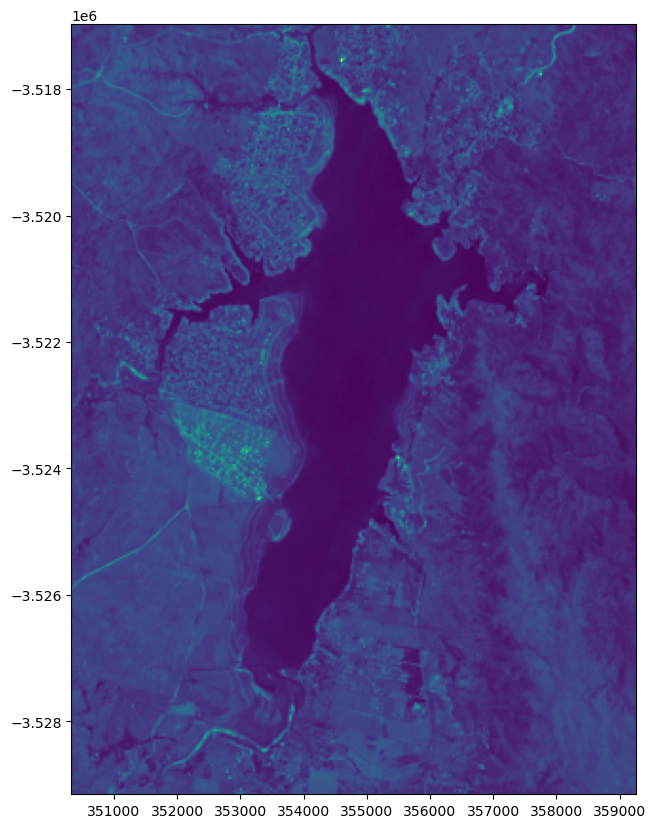

In [6]:
# Ruta del archivo TIF
Banda4 = '2023-01-06.SR_B4.tif'

# Abrir el archivo B4
with rasterio.open(Banda4) as src:
    # Mostrar los metadatos generales del archivo
    print("Metadatos generales del archivo:")
    for key, value in src.meta.items():
        print(f"{key}: {value}")

    # Número de bandas
    Banda4 = src.count
    print(f"\nNúmero de bandas: {numero_bandas}")

    # Mostrar información específica de cada banda
    for i in range(1, numero_bandas + 1):
        print(f"\nMetadatos de la banda 4")
        
        # Dimensiones de la banda
        ancho_banda = src.width
        alto_banda = src.height
        resolucion = src.res
        
        # Tipo de datos de la banda
        dtype_banda = src.dtypes[i - 1]
        
        # Sistema de referencia de coordenadas (CRS) de la banda
        crs_banda = src.crs
        
        print(f"Ancho: {ancho_banda}")
        print(f"Alto: {alto_banda}")
        print(f"Resolución: {resolucion}")
        print(f"Tipo de datos: {dtype_banda}")
        print(f"CRS: {crs_banda}")
        
        # Leer los datos de la banda
        datos_banda4 = src.read(i)
        
        # Mostrar algunas estadísticas de los datos de la banda (opcional)
        print(f"Estadísticas de los datos de la banda 4:")
        print(f"  Mínimo: {datos_banda4.min()}")
        print(f"  Máximo: {datos_banda4.max()}")
        print(f"  Promedio: {datos_banda4.mean()}")
        print(f"  Desviación estándar: {datos_banda4.std()}")
    
    # Mostrar la imagen usando rasterio y matplotlib
    plt.figure(figsize=(10, 10))
    show(datos_banda4, transform=src.transform)
    plt.show()

Metadatos generales del archivo:
driver: GTiff
dtype: uint16
nodata: 0.0
width: 298
height: 406
count: 1
crs: EPSG:32620
transform: | 30.00, 0.00, 350325.00|
| 0.00,-30.00,-3516975.00|
| 0.00, 0.00, 1.00|

Número de bandas: 1

Metadatos de la banda 5
Ancho: 298
Alto: 406
Resolución: (30.0, 30.0)
Tipo de datos: uint16
CRS: EPSG:32620
Estadísticas de los datos de la banda 5
  Mínimo: 6891
  Máximo: 30102
  Promedio: 16473.743759711706
  Desviación estándar: 3921.5054827576064


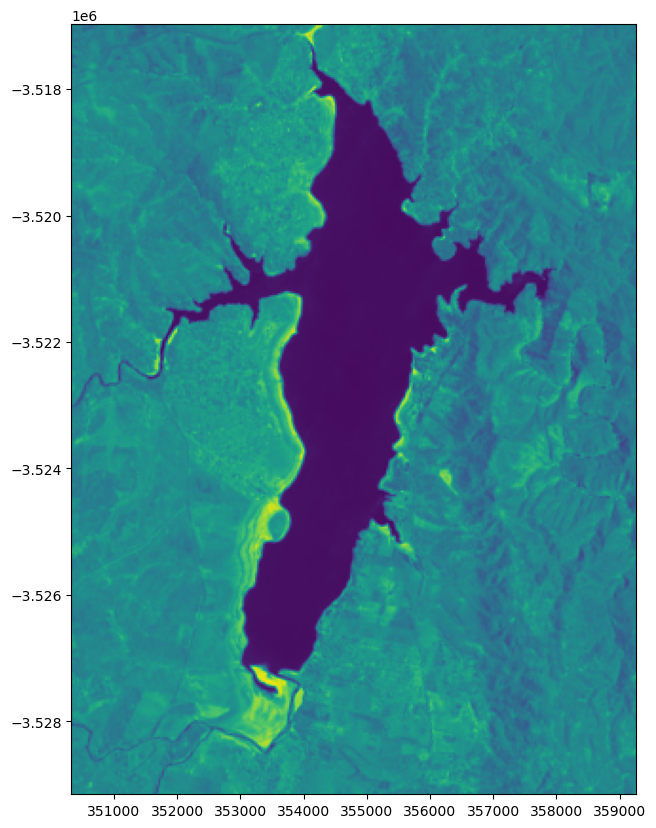

In [7]:
# Ruta del archivo TIF
Banda5 = '2023-01-06.SR_B5.tif'

# Abrir el archivo B5
with rasterio.open(Banda5) as src:
    # Mostrar los metadatos generales del archivo
    print("Metadatos generales del archivo:")
    for key, value in src.meta.items():
        print(f"{key}: {value}")

    # Número de bandas
    Banda5 = src.count
    print(f"\nNúmero de bandas: {Banda5}")

    # Mostrar información específica de cada banda
    for i in range(1, Banda5 + 1):
        print(f"\nMetadatos de la banda 5")
        
        # Dimensiones de la banda
        ancho_banda = src.width
        alto_banda = src.height
        resolucion = src.res
        
        # Tipo de datos de la banda
        dtype_banda = src.dtypes[i - 1]
        
        # Sistema de referencia de coordenadas (CRS) de la banda
        crs_banda = src.crs
        
        print(f"Ancho: {ancho_banda}")
        print(f"Alto: {alto_banda}")
        print(f"Resolución: {resolucion}")
        print(f"Tipo de datos: {dtype_banda}")
        print(f"CRS: {crs_banda}")
        
        # Leer los datos de la banda
        datos_banda5 = src.read(i)
        
        # Mostrar algunas estadísticas de los datos de la banda (opcional)
        print(f"Estadísticas de los datos de la banda 5")
        print(f"  Mínimo: {datos_banda5.min()}")
        print(f"  Máximo: {datos_banda5.max()}")
        print(f"  Promedio: {datos_banda5.mean()}")
        print(f"  Desviación estándar: {datos_banda5.std()}")
    
    # Mostrar la imagen usando rasterio y matplotlib
    plt.figure(figsize=(10, 10))
    show(datos_banda5, transform=src.transform)
    plt.show()

Metadatos generales del archivo:
driver: GTiff
dtype: uint16
nodata: 0.0
width: 298
height: 406
count: 1
crs: EPSG:32620
transform: | 30.00, 0.00, 350325.00|
| 0.00,-30.00,-3516975.00|
| 0.00, 0.00, 1.00|

Número de bandas: 1

Metadatos de la banda 6
Ancho: 298
Alto: 406
Resolución: (30.0, 30.0)
Tipo de datos: uint16
CRS: EPSG:32620
Estadísticas de los datos de la banda 6
  Mínimo: 7127
  Máximo: 26631
  Promedio: 14441.139724600787
  Desviación estándar: 3270.428823477381


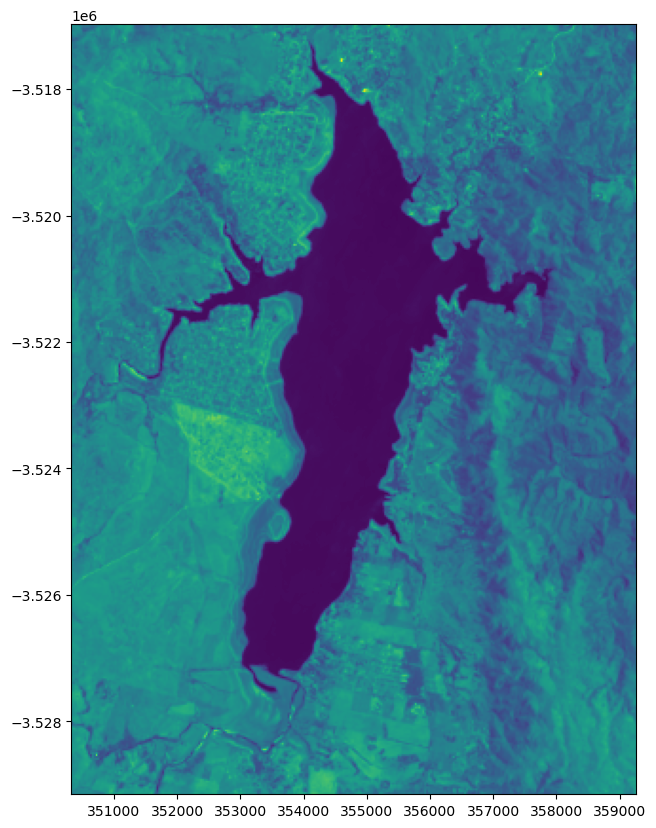

In [8]:
# Ruta del archivo TIF
Banda6 = '2023-01-06.SR_B6.tif'

# Abrir el archivo B6
with rasterio.open(Banda6) as src:
    # Mostrar los metadatos generales del archivo
    print("Metadatos generales del archivo:")
    for key, value in src.meta.items():
        print(f"{key}: {value}")

    # Número de bandas
    Banda6 = src.count
    print(f"\nNúmero de bandas: {Banda6}")

    # Mostrar información específica de cada banda
    for i in range(1, Banda6 + 1):
        print(f"\nMetadatos de la banda 6")
        
        # Dimensiones de la banda
        ancho_banda = src.width
        alto_banda = src.height
        resolucion = src.res
        
        # Tipo de datos de la banda
        dtype_banda = src.dtypes[i - 1]
        
        # Sistema de referencia de coordenadas (CRS) de la banda
        crs_banda = src.crs
        
        print(f"Ancho: {ancho_banda}")
        print(f"Alto: {alto_banda}")
        print(f"Resolución: {resolucion}")
        print(f"Tipo de datos: {dtype_banda}")
        print(f"CRS: {crs_banda}")
        
        # Leer los datos de la banda
        datos_banda6 = src.read(i)
        
        # Mostrar algunas estadísticas de los datos de la banda (opcional)
        print(f"Estadísticas de los datos de la banda 6")
        print(f"  Mínimo: {datos_banda6.min()}")
        print(f"  Máximo: {datos_banda6.max()}")
        print(f"  Promedio: {datos_banda6.mean()}")
        print(f"  Desviación estándar: {datos_banda6.std()}")
    
    # Mostrar la imagen usando rasterio y matplotlib
    plt.figure(figsize=(10, 10))
    show(datos_banda6, transform=src.transform)
    plt.show()

# 3-  Identificar posibles outlier y enmascararlos a valores nan

Una vez obtenidos los metadatos de las imagenes, identificaremos aquellos datos outliers que queremos descartar en nuestro análisis, para ello convertiremos nuestros datos a un array de tipo float (o decimales), para cada banda.

In [9]:
import numpy as np

# Convertir el array de enteros a tipo float
array_floats3 = datos_banda3.astype(float)

# Verificar el tipo de datos del nuevo array
print("Tipo de datos del nuevo array:")
print(array_floats3.dtype)

# Imprimir el nuevo array
print("\nArray convertido a tipo float:")
print(array_floats3)

Tipo de datos del nuevo array:
float64

Array convertido a tipo float:
[[10436. 10323. 10138. ...  8955.  8654.  8928.]
 [10224. 10182. 10237. ...  8799.  8724.  8796.]
 [10109. 10054. 10160. ...  8751.  8771.  8857.]
 ...
 [10112. 10019.  9872. ...  9971. 10329. 10483.]
 [ 9792.  9688.  9889. ...  9904. 10198. 10467.]
 [ 9526.  9860.  9939. ...  9784. 10120. 10413.]]


In [10]:
# Convertir el array de enteros a tipo float
array_floats4 = datos_banda4.astype(float)

# Verificar el tipo de datos del nuevo array
print("Tipo de datos del nuevo array:")
print(array_floats4.dtype)

# Imprimir el nuevo array
print("\nArray convertido a tipo float:")
print(array_floats4)

Tipo de datos del nuevo array:
float64

Array convertido a tipo float:
[[10554. 10363. 10143. ...  8773.  8477.  8723.]
 [10381. 10231. 10334. ...  8478.  8385.  8473.]
 [10261. 10133. 10224. ...  8406.  8416.  8487.]
 ...
 [ 9951.  9791.  9629. ... 10016. 10327. 10628.]
 [ 9551.  9425.  9619. ...  9846. 10144. 10592.]
 [ 9180.  9642.  9747. ...  9759. 10081. 10454.]]


In [11]:
# Convertir el array de enteros a tipo float
array_floats5 = datos_banda5.astype(float)

# Verificar el tipo de datos del nuevo array
print("Tipo de datos del nuevo array:")
print(array_floats5.dtype)

# Imprimir el nuevo array
print("\nArray convertido a tipo float:")
print(array_floats5)

Tipo de datos del nuevo array:
float64

Array convertido a tipo float:
[[17461. 17463. 17332. ... 16574. 15994. 16468.]
 [17455. 16799. 17242. ... 16684. 16289. 15921.]
 [16343. 16242. 16745. ... 16279. 16164. 15939.]
 ...
 [17779. 18031. 17695. ... 16719. 17936. 18183.]
 [17786. 17910. 17887. ... 17045. 18540. 18314.]
 [17183. 17916. 17913. ... 16718. 18381. 18642.]]


In [12]:
# Convertir el array de enteros a tipo float
array_floats6 = datos_banda6.astype(float)

# Verificar el tipo de datos del nuevo array
print("Tipo de datos del nuevo array:")
print(array_floats6.dtype)

# Imprimir el nuevo array
print("\nArray convertido a tipo float:")
print(array_floats6)

Tipo de datos del nuevo array:
float64

Array convertido a tipo float:
[[17160. 17268. 16703. ... 14305. 13286. 14091.]
 [16806. 16631. 16778. ... 13101. 12763. 12945.]
 [16265. 16119. 16337. ... 12767. 12736. 12845.]
 ...
 [16970. 16575. 15898. ... 16131. 17405. 18370.]
 [16119. 15682. 15840. ... 15961. 16974. 18180.]
 [15143. 15682. 16060. ... 15664. 16789. 17931.]]


Una vez realizada la conversion de matrices de tipo enteras a tipo float, procederemos a generar un histograma para cada banda, de esa manera podremos observar dentro de un gráfico cuales son aquellos valores validos y cuales son aquellos fuera de rango o outliers.

Esto lo realizaremos para cada banda.

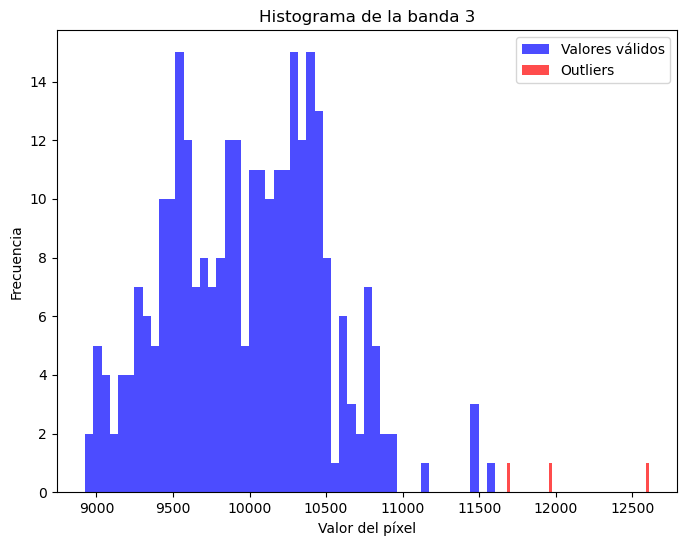

In [13]:
# Función para identificar outliers en una banda específica
def identificar_outliers(array_floats3, desviaciones_std=3):
    """
    Identifica valores atípicos en una banda de una imagen satelital basándose en la desviación estándar.

    :param banda: numpy array, la banda de la imagen satelital.
    :param desviaciones_std: int, número de desviaciones estándar por encima y por debajo de la media para considerar un valor como outlier.
    :return: numpy array, una máscara booleana que indica los valores atípicos.
    """
    media = np.mean(array_floats3)
    desviacion_std = np.std(array_floats3)
    limite_superior = media + desviaciones_std * desviacion_std
    limite_inferior = media - desviaciones_std * desviacion_std
    outliers = np.logical_or(array_floats3 > limite_superior, array_floats3 < limite_inferior)
    return outliers


# Iterar sobre cada banda para identificar outliers
for i, banda in enumerate(array_floats3, start=1):
    outliers = identificar_outliers(banda)

# Visualizar la distribución de los valores de píxel
plt.figure(figsize=(8, 6))
plt.hist(banda[~outliers].flatten(), bins=50, color='blue', alpha=0.7, label='Valores válidos')
plt.hist(banda[outliers].flatten(), bins=50, color='red', alpha=0.7, label='Outliers')
plt.title(f'Histograma de la banda 3')
plt.xlabel('Valor del píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


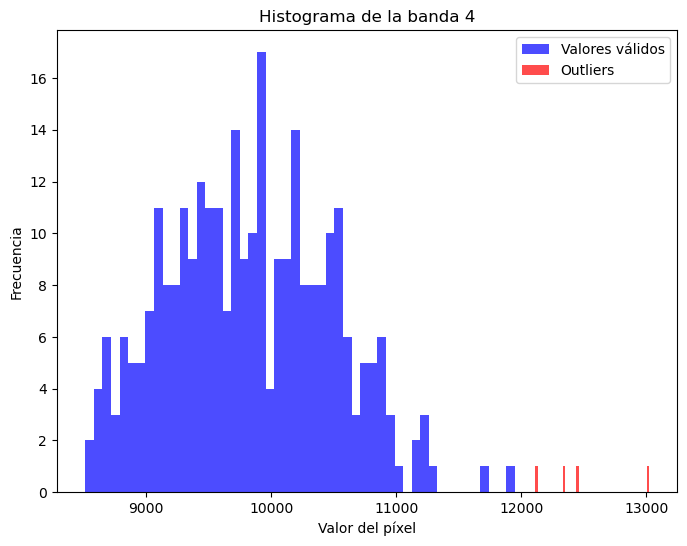

In [14]:
# Función para identificar outliers en una banda específica
def identificar_outliers(array_floats4, desviaciones_std=3):
    """
    Identifica valores atípicos en una banda de una imagen satelital basándose en la desviación estándar.

    :param banda: numpy array, la banda de la imagen satelital.
    :param desviaciones_std: int, número de desviaciones estándar por encima y por debajo de la media para considerar un valor como outlier.
    :return: numpy array, una máscara booleana que indica los valores atípicos.
    """
    media = np.mean(array_floats4)
    desviacion_std = np.std(array_floats4)
    limite_superior = media + desviaciones_std * desviacion_std
    limite_inferior = media - desviaciones_std * desviacion_std
    outliers = np.logical_or(array_floats4 > limite_superior, array_floats4 < limite_inferior)
    return outliers


# Iterar sobre cada banda para identificar outliers
for i, banda in enumerate(array_floats4, start=1):
    outliers = identificar_outliers(banda)

# Visualizar la distribución de los valores de píxel
plt.figure(figsize=(8, 6))
plt.hist(banda[~outliers].flatten(), bins=50, color='blue', alpha=0.7, label='Valores válidos')
plt.hist(banda[outliers].flatten(), bins=50, color='red', alpha=0.7, label='Outliers')
plt.title(f'Histograma de la banda 4')
plt.xlabel('Valor del píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


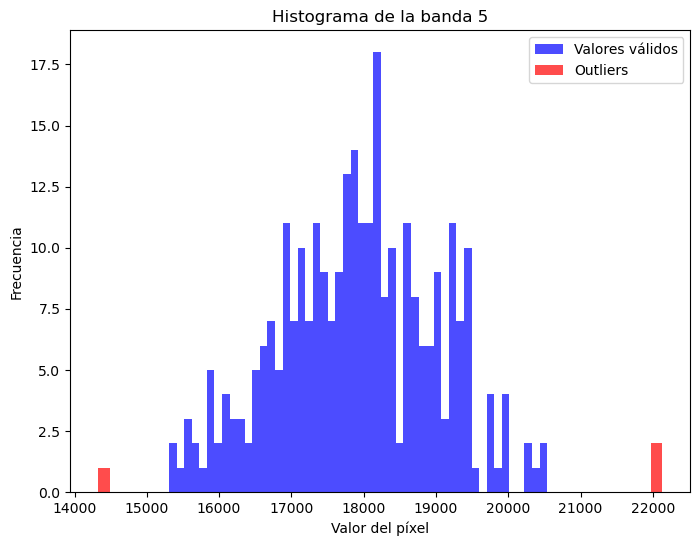

In [15]:
# Función para identificar outliers en una banda específica
def identificar_outliers(array_floats5, desviaciones_std=3):
    """
    Identifica valores atípicos en una banda de una imagen satelital basándose en la desviación estándar.

    :param banda: numpy array, la banda de la imagen satelital.
    :param desviaciones_std: int, número de desviaciones estándar por encima y por debajo de la media para considerar un valor como outlier.
    :return: numpy array, una máscara booleana que indica los valores atípicos.
    """
    media = np.mean(array_floats5)
    desviacion_std = np.std(array_floats5)
    limite_superior = media + desviaciones_std * desviacion_std
    limite_inferior = media - desviaciones_std * desviacion_std
    outliers = np.logical_or(array_floats5 > limite_superior, array_floats5 < limite_inferior)
    return outliers


# Iterar sobre cada banda para identificar outliers
for i, banda in enumerate(array_floats5, start=1):
    outliers = identificar_outliers(banda)

# Visualizar la distribución de los valores de píxel
plt.figure(figsize=(8, 6))
plt.hist(banda[~outliers].flatten(), bins=50, color='blue', alpha=0.7, label='Valores válidos')
plt.hist(banda[outliers].flatten(), bins=50, color='red', alpha=0.7, label='Outliers')
plt.title(f'Histograma de la banda 5')
plt.xlabel('Valor del píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

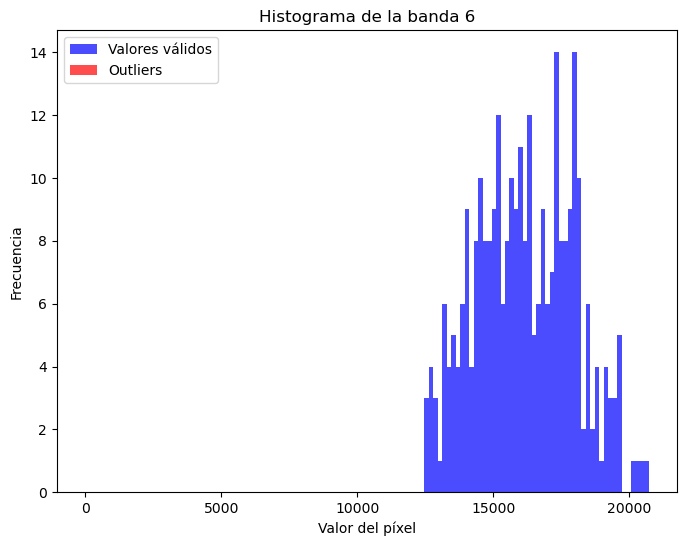

In [16]:
# Función para identificar outliers en una banda específica
def identificar_outliers(array_floats6, desviaciones_std=3):
    """
    Identifica valores atípicos en una banda de una imagen satelital basándose en la desviación estándar.

    :param banda: numpy array, la banda de la imagen satelital.
    :param desviaciones_std: int, número de desviaciones estándar por encima y por debajo de la media para considerar un valor como outlier.
    :return: numpy array, una máscara booleana que indica los valores atípicos.
    """
    media = np.mean(array_floats6)
    desviacion_std = np.std(array_floats6)
    limite_superior = media + desviaciones_std * desviacion_std
    limite_inferior = media - desviaciones_std * desviacion_std
    outliers = np.logical_or(array_floats6 > limite_superior, array_floats6 < limite_inferior)
    return outliers


# Iterar sobre cada banda para identificar outliers
for i, banda in enumerate(array_floats6, start=1):
    outliers = identificar_outliers(banda)

# Visualizar la distribución de los valores de píxel
plt.figure(figsize=(8, 6))
plt.hist(banda[~outliers].flatten(), bins=50, color='blue', alpha=0.7, label='Valores válidos')
plt.hist(banda[outliers].flatten(), bins=50, color='red', alpha=0.7, label='Outliers')
plt.title(f'Histograma de la banda 6')
plt.xlabel('Valor del píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Calcular índice NDVI

Ahora en esta sección obtendremos el indice NDVI y MNDWI, y lo graficaremos

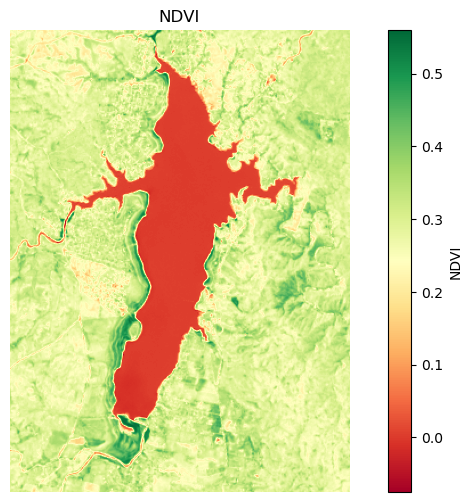

In [17]:
# Calcular el NDVI
ndvi = (array_floats5 - array_floats4) / (array_floats5 + array_floats4)

# Manejar divisiones por cero (cuando NIR + Red es 0) asignando NaN
ndvi[np.isnan(ndvi)] = 0  # Opcional: puedes manejar NaN de diferentes maneras

# Mostrar el NDVI usando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI')
plt.axis('off')
plt.show()

Ahora haremos una extracción de la máscara de la superficie del lago

[[0.00359172 0.00340448 0.00307491 ...        nan        nan        nan]
 [0.00340582 0.00295295 0.00229764 ...        nan        nan        nan]
 [0.00281801 0.00419562 0.00276389 ...        nan        nan        nan]
 ...
 [0.00283725 0.00395257 0.00367292 ...        nan        nan        nan]
 [0.00406321 0.00381309 0.00360175 ...        nan        nan        nan]
 [0.00284128 0.00264124 0.00371986 ...        nan        nan        nan]]


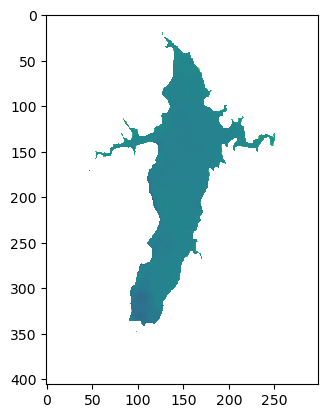

In [18]:
mascara_lago = ndvi < 0.1
ndvi_enmascarado = np.where(mascara_lago, ndvi, np.nan)
print(ndvi_enmascarado[200:240, 140:190])
plt.imshow(ndvi_enmascarado)

Guardaremos esta imagen en formato PNG utilizando 'output_MNDWI' como nombre del archivo en el directorio en el que estamos trabajando.

# Calcular índice MNDWI


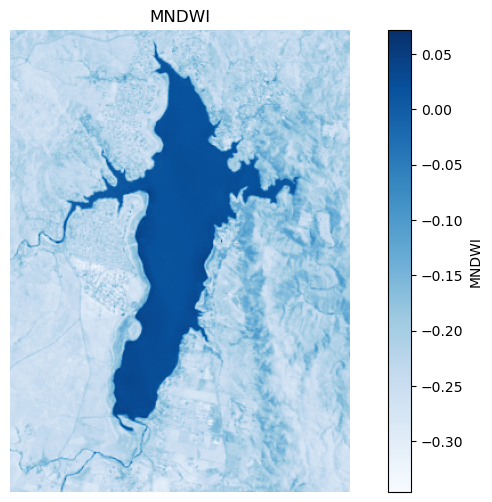

In [19]:
# Calcular el MNDWI
mndwi = (array_floats3 - array_floats6) / (array_floats3 + array_floats6)

# Manejar divisiones por cero (cuando Green + SWIR es 0) asignando NaN
mndwi[np.isnan(mndwi)] = 0  # Opcional: puedes manejar NaN de diferentes maneras

# Mostrar el MNDWI usando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(mndwi, cmap='Blues')
plt.colorbar(label='MNDWI')
plt.title('MNDWI')
plt.axis('off')
plt.show()

Ahora haremos una extracción de la máscara de la superficie del lago

[[0.01616123 0.01671507 0.01689886 ...        nan        nan        nan]
 [0.01592008 0.01638498 0.01601446 ...        nan        nan        nan]
 [0.01604071 0.01696665 0.01532889 ...        nan        nan        nan]
 ...
 [0.01811687 0.01733956 0.01823049 ...        nan        nan        nan]
 [0.01772281 0.0178617  0.0181772  ...        nan        nan        nan]
 [0.01767822 0.01845253 0.01815412 ...        nan        nan        nan]]


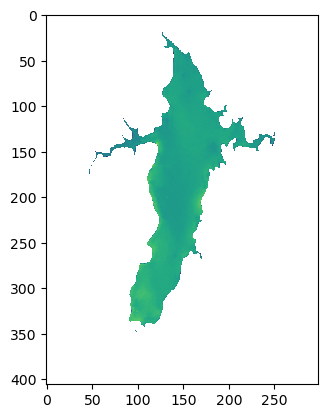

In [20]:
mascara_lago = mndwi > -0.05
mndwi_enmascarado = np.where(mascara_lago, mndwi, np.nan)
print(mndwi_enmascarado[200:240, 140:190])
plt.imshow(mndwi_enmascarado)

Guardaremos esta imagen en formato PNG utilizando 'output_MNDWI' como nombre del archivo en el directorio en el que estamos trabajando.

Felicitaciones! si llegaste hasta acá es porque haz terminado con el trabajo práctico.